# Keras를 사용한 인공 신경망


In [1]:
# Load dataset
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(np.int32)

## 인공 신경망(Artificial Neural Network, ANN)


인공 신경말이란 뇌에 있는 생물학적 뉴런의 네트워크에서 영감을 받은 머신러닝 모델이다.

1. 1957년 퍼셉트론 탄생

2. 1969년: 첫번째 딥러닝 겨울: 퍼셉트론은 XOR 문제를 풀 수 없음을 수학적으로 증명하여 퍼셉트론의 한계 증명

3. 1974년: 폴 웨어보스, 역전파 알고리즘 발표

4. 1986년: 제프리 한튼, 역전파 알고리즘을 이용한 다층 퍼셉트론으로 숫자 인식 문제 해결

5. 1988년: 얀 르쿤 CNN 발표

6. ~2000년: 두번째 딥러닝 겨울: 기울기 소실 문제 등으로 딥러닝 연구가 중단

7. 현재까지: ReLU, 가중치 초기화 방법 개선, 등의 방법을 통해 기울기 소실 문제 해결 및 딥러닝 연구 활발

<br>

현재 인공 신경망이 부흥할 수 있었던 배경에는

- 컴퓨터 성능 개선

- 대량의 데이터

- 알고리즘 개선

등이 있다.


## 단층 퍼셉트론


### 퍼셉트론이란


퍼셉트론이란 가장 단순한 인공 신경망 구조로 1957년 파랑크 로젠블라트가 제안하였다.

모든 입력은 가중치와 연결되며 헤비사이드 계단 함수를 사용했기에 TLU(Threshold Logic Unit)이라고도 한다.

모든 입력값의 선형 조합을 계산한 다음 활성함수인 계산함수를 적용하여 양성/음성을 분류하는 것이기에 작동은 로지스틱 회귀 또는 선형 SVM 분류기와 유사하다.


### 퍼셉트론 학습 알고리즘


퍼셉트론 학습 알고리즘은 경사하강법의 기본 아이디어와 매우 유사하다.

하나의 샘플이 입력될 때 마다 예측한 후에 오차를 계산하여 오차가 줄어드는 방향으로 가중치를 조절한다.

수식으로 아래와 같다.

$$w_{i,j}^{(next step)} = w_{i,j} + \eta(y_j - \hat{y}_j)x_i$$


### 퍼셉트론의 선형성


임곗값 기준의 계단함수를 활성함수로 사용하였기에 퍼셉트론의 각 출력 뉴런의 결정경계는 선형이다.

따라서 퍼셉트론은 선형적으로 구분될 수 있는 데이터셋에 대해서만 작동한다. 복잡한 패턴은 학습하지 못한다.


### Code


sklearn의 Perceptron을 사용하여 선형 분류를 수행할 수 있다.


In [5]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(max_iter=1000,    # 반복 횟수
                     tol=1e-3,         # 반복 중단 시점 (loss가 tol보다 작아지면 중단)
                     random_state=42)
per_clf.fit(X, y)

per_clf.predict([[2, 0.5]])[0]

1

아래와 같이 시각화하였을 때 선형적으로 분류됨을 확인할 수 있다.

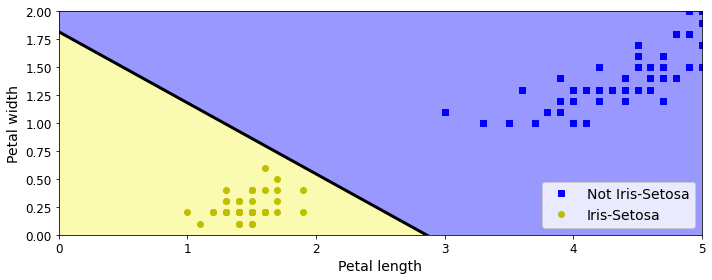


### Code: 활성화 함수에 따른 XOR 문제 해결


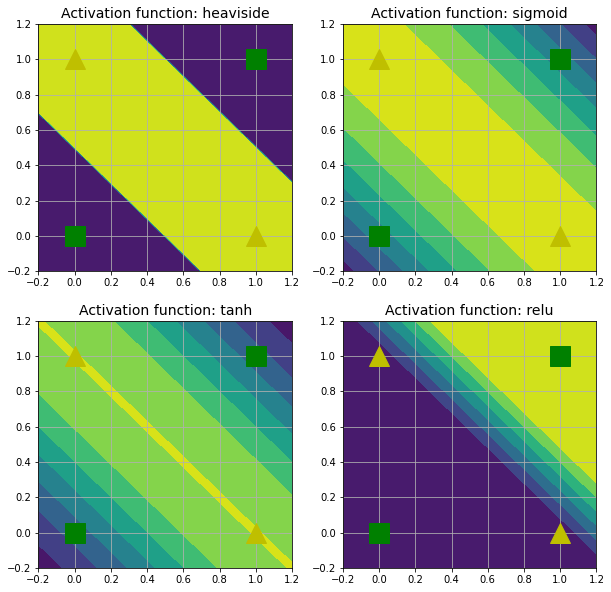

In [14]:
def relu(z): return np.maximum(0, z)
def sigmoid(z): return 1 / (1 + np.exp(-z))
def heaviside(z): return (z >= 0).astype(z.dtype)


def derivative(z): return (np.sign(z + 0.000001) -
                           np.sign(z - 0.000001))/(2 * 0.000001)


def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)


x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

plt.figure(figsize=(10, 10))
for index, activation_function in enumerate((heaviside, sigmoid, np.tanh, relu)):
    plt.subplot(221 + index)
    plt.contourf(x1, x2, mlp_xor(x1, x2, activation=activation_function))
    plt.plot([0, 1], [0, 1], "gs", markersize=20)
    plt.plot([0, 1], [1, 0], "y^", markersize=20)
    plt.title(
        f"Activation function: {activation_function.__name__}", fontsize=14)
    plt.grid(True)

## 다층 퍼셉트론(MLP)


퍼셉트론을 여러 개 쌓아올린 인경신경망을 다층 퍼셉트론(MultiLayer Perceptron, MLP)라고 한다.

하나의 입력층, 하나 이상의 TLU층과 하나의 출력층으로 구성된다.

모든 층은 편향을 포함하여, 다음 층과 완전히 연결되어 있기에 완전 연결층(Fully Connected Layer)라고 한다.

완전 연결층에서 이루어지는 연산은 행렬 수식으로 표현 가능하며 다음과 같다.

$$ h\_{W,b}(X) = \phi(XW + b) $$


### 역전파 알고리즘


다층 퍼셉트론은 층이 많을 수록 훈련시키는 과정이 점점 더 어려워진다.

또한 경사하강법을 수행하기 위해 미분을 수행하는 것은 시간이 많이 소모된다.

이에 역전파 알고리즘(backpropagation algorithm)이 등장하게 된다.

역전파 알고리즘은 미적분의 연쇄법칙(chain rule)이 적용하여 각 연결 가중치가 오차에 기여한 정도를 측정하고 이를 토대로 경사 하강법 단계에서 경사 하강법을 적용한다. 이에 아래 과정을 반복하며 빠르고 효율적으로 최적의 가중치를 찾아낸다.

1. 순방향 계산(forward)를 통해 예측값과 오차값을 계산한다.

2. 역전파 계산(backward)을 통해 각 연결 가중치가 오차에 기여한 정도를 측정한다.

3. 가중치 조정(weight update)을 통해 오차를 줄이는 방향으로 가중치를 조정한다.

<br>

MLP는 backpropagation을 통해 학습 속도를 획기적으로 높일 수 있었으나 여전히 선형 분류기에 의존하고 있다는 한계점을 지닌다.


## 심층신경망(DNN)


2개 이상의 은닉층을 가지는 MLP를 심층신경망(deep neural network, DNN)라고 한다.

MLP와 명확하게 구분하지는 않으나 활성함수로 비선형 함수를 사용하는 것을 통해 MLP와 구분한다.

MLP는 계단함수를 통해 항상 선형 분류기를 사용하였다면, DNN은 sigmoid, relu, hiperbolic tangent와 같은 비선형 함수를 통해 비선형 분류기를 사용한다.

> 선형 변환은 층을 아무리 많이 쌓아도 하나의 레이어의 가중치를 조정해 동일한 효과를 낼 수 있기에 복잡한 문제 해결을 할 수 없다는 한계가 있다.


### DNN 회귀


DNN을 이용한 회귀는 아래 특징을 가진다.

- 입력 벡터의 차원와 출력 벡터의 차원 수를 입력과 출력 뉴런의 수로 정한다.

- 손실함수는 주로 MSE, MAE, Huber loss를 사용한다.

> 출력 뉴런 수가 2개 이상일 경우 **다변량 회귀**라고 한다. 동시에 여러값을 예측하기 때문이다.


### DNN 분류


DNN을 이용한 분류는 아래 특징을 가진다.

- 입력 벡터의 차원와 출력 벡터의 차원 수를 입력과 출력 뉴런의 수로 정한다. 다만 많은 경우 이진 분류의 경우 출력 뉴런의 수는 1개로 한다.

- 손실함수는 주로 Cross Entropy 함수를 사용한다.


## Tensorflow & Keras


### 분류


Keras는 모든 종류의 신경망을 손쉽게 만들어 주는 최상위 딥러닝 API 패키지로 본 과정에서는 tensorflow만을 지원하는 tensorflow.keras를 이용할 것이다.


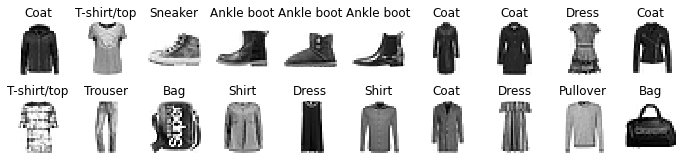

((55000, 28, 28), (5000, 28, 28), (10000, 28, 28), (55000,), (5000,), (10000,))

In [18]:
# Load packages
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
fashion_mnist = keras.datasets.fashion_mnist
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress",
               "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# 5000개의 validation set을 만들고, 255로 나누어 scaling
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

# Show images


def show_image(images, labels):
    n_rows = 2
    n_cols = 10
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(images[index], cmap="binary", interpolation="nearest")
            plt.axis('off')
            plt.title(class_names[labels[index]], fontsize=12)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()


show_image(X_train, y_train)

# Show shape
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

In [4]:
# 모델 레이어 정의
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # 노드가 784개인 input layer
    keras.layers.Dense(300, activation="relu"),  # 노드가 300개인 hidden layer
    keras.layers.Dense(100, activation="relu"),  # 노드가 100개인 hidden layer
    keras.layers.Dense(10, activation="softmax")  # 노드가 10개인 output layer
])
model.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


2023-11-26 11:31:01.120563: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-26 11:31:01.120704: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
# 손실값은 sparse_categorical_crossentropy를 사용하고, optimizer는 경사하강법으로 학습
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", metrics=["accuracy"])

# 30번의 반복으로 학습을 수행.
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30


2023-11-26 11:37:42.657545: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-11-26 11:37:42.805844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.6977 - accuracy: 0.7696

2023-11-26 11:37:51.871933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 10s 5ms/step - loss: 0.6977 - accuracy: 0.7696 - val_loss: 0.5121 - val_accuracy: 0.8280
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4899 - accuracy: 0.8287 - val_loss: 0.4605 - val_accuracy: 0.8386
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4458 - accuracy: 0.8435 - val_loss: 0.4117 - val_accuracy: 0.8634
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4196 - accuracy: 0.8526 - val_loss: 0.4167 - val_accuracy: 0.8510
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4001 - accuracy: 0.8606 - val_loss: 0.3848 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3832 - accuracy: 0.8656 - val_loss: 0.3732 - val_accuracy: 0.8744
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3693 - accuracy: 0.8701 - val_loss: 0.3640 - val_accuracy: 0.8736
E

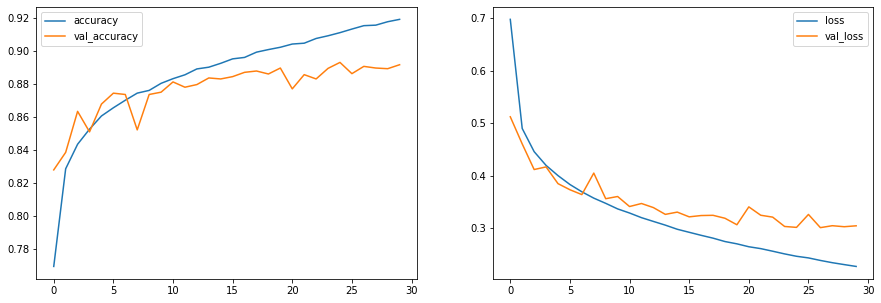

In [9]:
# 정화도와 손실값을 그래프로 확인
df = pd.DataFrame(history.history)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
df.plot(y=['accuracy', 'val_accuracy'], ax=ax1)
df.plot(y=['loss', 'val_loss'], ax=ax2)
plt.show()

In [13]:
# test 데이터로 모델의 정확도 확인
# 모델은 0.34의 손실값과 0.88의 정확도를 보임
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3436 - accuracy: 0.8799


[0.34358498454093933, 0.8798999786376953]

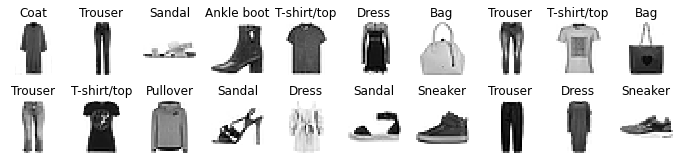

In [23]:
# 몇 개의 샘플을 가져와 모델이 올바른 예측을 수행하는지 확인해보자.

# 추출할 이미지의 인덱스를 랜덤으로 추출
sample_indexs = np.random.randint(0, len(X_test), 20)

# 추출한 인덱스의 이미지를 예측하고, 실제값과 비교
X_sample = X_test[sample_indexs]
pred_sample = np.argmax(model.predict(X_sample), axis=-1)
y_sample = y_test[sample_indexs]

# 이미지로 확인: 대부분 정확하게 예측하나 14번째 샌달과 구두를 혼동하는 경우가 있는 것처럼 정확도가 100%는 아님
show_image(X_sample, pred_sample)

### 회귀


회귀 또한 분류와 큰 틀에서는 유사하다. 다만 회귀를 수행해야 함으로 출력함수는 cross entropy가 아닌 MSE를 주로 사용한다.

또한 하나의 값을 예측하는 것이기에 출력층의 뉴런 수는 1개로 한다.


In [24]:
# Load dataset and scaling and split train, valid, test
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# load dataset
housing = fetch_california_housing()

# split train, valid, test
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((11610, 8), (3870, 8), (5160, 8), (11610,), (3870,), (5160,))

In [25]:
# Create model and predict
# 입력층과 출력층으로 구성된 단순한 모델 생성
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

# 모델 컴파일: 손실함수는 mean_squared_error, optimizer는 경사하강법 사용
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# 20번의 반복으로 학습을 수행.
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
 16/363 [>.............................] - ETA: 1s - loss: 5.6778  

2023-11-26 11:56:01.927913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 2.2375

2023-11-26 11:56:03.514384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 5ms/step - loss: 2.2375 - val_loss: 0.9987
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.8384 - val_loss: 0.7298
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.7167 - val_loss: 0.6719
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6641 - val_loss: 0.6314
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6256 - val_loss: 0.5746
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5936 - val_loss: 0.5467
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5673 - val_loss: 0.5231
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5445 - val_loss: 0.5030
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5254 - val_loss: 0.4866
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5085 - val_loss: 0.4701
Epoch 11/2

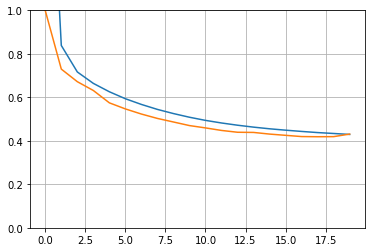

In [29]:
# 학습을 반복할수록 손실값이 작아짐을 확인할 수 있다.
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
# test 데이터의 손실값은 0.42로 학습이 잘 이루어졌음을 확인할 수 있다.
# 분류와 달리 MSE를 이용해 모델의 성능을 평가하기에 정확도를 명확하게 정의할 수 없어 loss값을 확인하는 것이 일반적이다.
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.4196


0.4196298122406006

### 함수형 API 사용


위에서 모델을 만들 때 Sequential API를 사용하였다. 말 그대로 순차적으로 모델을 만들어 나가는 방식으로 단순하나 복잡한 모델을 만들기에는 한계가 있다.

Wide & Deep 신경망과 같이 각 레이어를 병렬로 연결해야 하는 경우에는 함수형 API를 통해 직접 레이어를 연결해주어야 한다.

연결하는 방법은 간단하다. 레이어를 정의한 다음, 이전 레이어를 다음 레이어의 입력으로 넣어주기만 하면 된다.

예를 들어 아래 두 모델은 같은 구조를 가지고 있다.


In [33]:
keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
]).summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 30)                270       
                                                                 
 dense_12 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [41]:
# 입력 값을 형태를 정의
input_shape = keras.layers.Input(shape=X_train.shape[1:], name="input")

# 입력 레이어 생성
input_layer = keras.layers.Dense(30, activation="relu")(input_shape)

# 출력 레이어 생성
output_layer = keras.layers.Dense(1)(input_layer)

# 입력과 출력을 정의하여 모델 생성
model = keras.models.Model(inputs=[input_shape], outputs=[output_layer])
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 8)]               0         
                                                                 
 dense_20 (Dense)            (None, 30)                270       
                                                                 
 dense_21 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


와아드 & 딥 구조의 예시이다. concatenate를 통해 두 레이어를 병렬로 연결할 수 있다.

<img src="https://raw.githubusercontent.com/jaewonE/muchine_learning_notebook/main/notes/images/end_to_end_project/wide_and_deep.png" alt="wide and deep">


In [42]:
# 왼쪽에서 첫번째 모델
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_22 (Dense)               (None, 30)           270         ['input_4[0][0]']                
                                                                                                  
 dense_23 (Dense)               (None, 30)           930         ['dense_22[0][0]']               
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_4[0][0]',                
                                                                  'dense_23[0][0]']         

In [43]:
# 왼쪽에서 두번째 모델
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_25 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_26 (Dense)               (None, 30)           930         ['dense_25[0][0]']               
                                                                                            

In [44]:
# 왼쪽에서 세번째 모델
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

# 이 모델의 경우 output이 2개이므로 손실함수를 2개 지정해야 한다.
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_27 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_28 (Dense)               (None, 30)           930         ['dense_27[0][0]']               
                                                                                           

### 모델 저장과 복원


In [ ]:
# h5 파일을 통해 모델의 구조와 가중치를 저장할 수 있다. 이후 h5 파일을 불러와 모델을 복원할 수 있다.

# 모델 정의 및 학습
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

# h5 파일로 모델의 구조와 가중치를 저장할 수 있다.
model.save("my_keras_model.h5")                      # 모델 저장
model = keras.models.load_model("my_keras_model.h5")  # 모델 불러오기

# 모델 구조가 아닌 가중치만 저장하고 싶다면 save_weights()을 통해 checkpoint만을 저장할 수 있다.
model.save_weights("my_keras_weights.ckpt")  # 가중치 저장
model.load_weights("my_keras_weights.ckpt")  # 가중치 불러오기

# 불러온 모델은 기존 모델과 동일하게 사용될 수 있다.
model.predict(X_test)

### 콜백 함수


매 Epochs가 종료될 때 마다 호출되는 함수를 콜백 함수라고 한다.

콜백 함수를 통해 모델을 저장하거나, 학습률을 조정하거나, 조기 종료를 수행할 수 있다.


#### 모델 저장


대규모 데이터셋의 경우 학습 시간이 많이 소요된다. 이에 학습이 종료되었을 때 모델을 저장해두고 다음에 이어서 학습을 수행할 수 있다.

keras.classbacks의 ModelCheckpoint를 통해 모델을 저장할 수 있다.

save_best_only=True로 설정하면 검증 데이터의 성능이 최상인 모델만 저장할 수 있다.


In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# 검증 데이터셋의 예측 성능이 가장 좋은 모델을 저장하는 콜백 함수를 정의
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])  # 콜백 함수를 전달

# 최상의 모델을 불러와 테스트 데이터셋으로 예측
model2 = keras.models.load_model("my_keras_model.h5")
mse_test = model2.evaluate(X_test, y_test)

#### 조기 종료


EarlyStopping을 통해 검증 데이터의 성능이 더 이상 향상되지 않을 때 학습을 종료할 수 있다. 이를 통해 학습 시간 단축과 과적합을 방지할 수 잇따.

위와 동일하게 restore_best_weights=True로 설정하면 훈련이 끝난 후 최상의 가중치로 복원한다.


In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# 검증 데이터셋의 손실값이 10번 연속으로 줄어들지 않으면 학습을 중단하는 콜백 함수를 정의
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])  # 콜백 함수를 전달
mse_test = model.evaluate(X_test, y_test)

#### 사용자 정의 콜백 함수


keras.callbacks.Callback을 상속받아 사용자 정의 콜백 함수를 만들 수 있다.


In [ ]:
# 학습이 중단된 시점에서 val_loss와 train_loss의 비율을 출력하는 콜백 함수를 정의
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))


val_train_ratio_cb = PrintValTrainRatioCallback()  # 콜백 함수 인스턴스 생성

history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])  # 콜백 함수를 전달

### 텐서 보드


TensorBoard를 통해 학습 과정을 시각화할 수 있다. TensorBoard 인스턴스를 콜백함수로 전달하여 값을 측정할 수 있다.


In [ ]:
import time

# timestamp를 이름으로 하는 tensorboard log를 저장하는 콜백 함수를 정의
tensorboard_cb = keras.callbacks.TensorBoard(
    time.strftime("run_%Y_%m_%d-%H_%M_%S"))

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])  # 여러 개의 콜백 함수를 전달

### 하이퍼 파라미터 튜닝


신경망은 조정해야 할 하이퍼 파라미터가 많다. 이를 위해 GridSearchCV나 RandomizedSearchCV를 통해 하이퍼 파라미터를 튜닝할 수 있다.


In [ ]:
# 모델을 생성하는 함수 정의
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model


# KerasRegressor를 사용해 Scikit-Learn의 RandomizedSearchCV를 수행할 수 있다.
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

# RandomizedSearchCV를 통해 최적의 하이퍼파라미터를 찾는다.
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

# 하이퍼파라미터의 범위를 정의
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

# RandomizedSearchCV를 통해 최적의 하이퍼파라미터를 찾는다.
rnd_search_cv = RandomizedSearchCV(
    keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)

# RandomizedSearchCV를 통해 찾은 최적의 하이퍼파라미터를 사용해 모델을 학습한다.
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

rnd_search_cv.best_params_  # 최적의 하이퍼파라미터
# {'learning_rate': 0.005803602934201024, 'n_hidden': 3, 'n_neurons': 74}

rnd_search_cv.best_score_  # 최적의 하이퍼파라미터로 학습한 모델의 평균 검증 점수
# -0.3189570407072703

model = rnd_search_cv.best_estimator_.model  # 최적의 하이퍼파라미터로 학습한 모델

model.evaluate(X_test, y_test)  # 최적의 하이퍼파라미터로 학습한 모델의 테스트 성능